In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/.DS_Store
/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/train/.DS_Store
/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/train/glasses/row-3-column-7.jpg
/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/train/glasses/row-4-column-1.jpg
/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/train/glasses/row-1-column-6.jpg
/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/train/glasses/row-1-column-9.jpg
/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/train/glasses/row-5-column-4.jpg
/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/train/glasses/row-4-column-2.jpg
/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/train/glasses/row-4-column-3.jpg
/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/train/glasses/row-4-column-10.jpg
/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/train/glasses/ro

In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras_preprocessing.image import ImageDataGenerator
import numpy as np

In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/validate", target_size=(224,224))

Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [6]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [7]:
#from keras.optimizers import Adam
#opt = Adam(lr=0.001)
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy']) 

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=1,generator=traindata, validation_data= testdata, validation_steps=1,epochs=50,callbacks=[checkpoint,early])

<ipython-input-9-81b35d609b76>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=1,generator=traindata, validation_data= testdata, validation_steps=1,epochs=50,callbacks=[checkpoint,early])


Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 0.7070 - accuracy: 0.5312

1/1 [==============================] - 33s 33s/step - loss: 0.7070 - accuracy: 0.5312 - val_loss: 7837.0488 - val_accuracy: 0.5312
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 10844.7305 - accuracy: 0.3438

1/1 [==============================] - 3s 3s/step - loss: 10844.7305 - accuracy: 0.3438 - val_loss: 4.7290 - val_accuracy: 0.5312
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 5.9935 - accuracy: 0.4062

1/1 [==============================] - 2s 2s/step - loss: 5.9935 - accuracy: 0.4062 - val_loss: 0.6847 - val_accuracy: 0.5625
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 0.6772 - accuracy: 0.5938

1/1 [==============================] - 2s 2s/step - loss: 0.6772 - accuracy: 0.5938 - val_loss: 0.8113 - val_accuracy: 0.4688
Epoch 5/50
1/1 [==============================] - ETA: 0s - loss: 0.7934 - accuracy: 0.5000

1/1 [==============================] - 3s 3s/step - loss: 0.7934 - accuracy: 0.5000 - val_loss: 0.7113 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - ETA: 0s - loss: 0.7093 - accuracy: 0.5000

1/1 [==============================] - 1s 911ms/step - loss: 0.7093 - accuracy: 0.5000 - val_loss: 0.6887 - val_accuracy: 0.5312
Epoch 7/50
1/1 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.5000

1/1 [==============================] - 1s 729ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6855 - val_accuracy: 0.5312
Epoch 8/50
1/1 [==============================] - ETA: 0s - loss: 0.6803 - accuracy: 0.5938

1/1 [==============================] - 1s 1s/step - loss: 0.6803 - accuracy: 0.5938 - val_loss: 1.7775 - val_accuracy: 0.5312
Epoch 9/50
1/1 [==============================] - ETA: 0s - loss: 1.8117 - accuracy: 0.5000

1/1 [==============================] - 1s 961ms/step - loss: 1.8117 - accuracy: 0.5000 - val_loss: 0.6826 - val_accuracy: 0.5625
Epoch 10/50
1/1 [==============================] - ETA: 0s - loss: 0.6821 - accuracy: 0.5625

1/1 [==============================] - 1s 729ms/step - loss: 0.6821 - accuracy: 0.5625 - val_loss: 0.9150 - val_accuracy: 0.4688
Epoch 11/50
1/1 [==============================] - ETA: 0s - loss: 0.9116 - accuracy: 0.4688

1/1 [==============================] - 1s 719ms/step - loss: 0.9116 - accuracy: 0.4688 - val_loss: 0.7123 - val_accuracy: 0.4688
Epoch 12/50
1/1 [==============================] - ETA: 0s - loss: 0.6944 - accuracy: 0.5312

1/1 [==============================] - 1s 753ms/step - loss: 0.6944 - accuracy: 0.5312 - val_loss: 0.6908 - val_accuracy: 0.5625
Epoch 13/50
1/1 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.4688

1/1 [==============================] - 1s 719ms/step - loss: 0.6940 - accuracy: 0.4688 - val_loss: 0.6991 - val_accuracy: 0.5000
Epoch 14/50
1/1 [==============================] - ETA: 0s - loss: 0.7043 - accuracy: 0.5000

1/1 [==============================] - 0s 425ms/step - loss: 0.7043 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5312
Epoch 15/50
1/1 [==============================] - ETA: 0s - loss: 0.6962 - accuracy: 0.3750

1/1 [==============================] - 0s 416ms/step - loss: 0.6962 - accuracy: 0.3750 - val_loss: 0.6925 - val_accuracy: 0.5312
Epoch 16/50
1/1 [==============================] - ETA: 0s - loss: 0.6952 - accuracy: 0.3750

1/1 [==============================] - 0s 414ms/step - loss: 0.6952 - accuracy: 0.3750 - val_loss: 0.6935 - val_accuracy: 0.4688
Epoch 17/50
1/1 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5000

1/1 [==============================] - 1s 722ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.5625
Epoch 18/50
1/1 [==============================] - ETA: 0s - loss: 0.7016 - accuracy: 0.1250

1/1 [==============================] - 0s 429ms/step - loss: 0.7016 - accuracy: 0.1250 - val_loss: 0.6939 - val_accuracy: 0.4688
Epoch 19/50
1/1 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5000

1/1 [==============================] - 1s 737ms/step - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.7042 - val_accuracy: 0.4375
Epoch 20/50
1/1 [==============================] - ETA: 0s - loss: 0.7056 - accuracy: 0.4375

1/1 [==============================] - 1s 719ms/step - loss: 0.7056 - accuracy: 0.4375 - val_loss: 0.6940 - val_accuracy: 0.4688
Epoch 21/50
1/1 [==============================] - ETA: 0s - loss: 0.6993 - accuracy: 0.3750

1/1 [==============================] - 1s 728ms/step - loss: 0.6993 - accuracy: 0.3750 - val_loss: 0.6931 - val_accuracy: 0.4375
Epoch 22/50
1/1 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5625

1/1 [==============================] - 1s 719ms/step - loss: 0.6930 - accuracy: 0.5625 - val_loss: 0.6935 - val_accuracy: 0.4688
Epoch 23/50
1/1 [==============================] - ETA: 0s - loss: 0.6942 - accuracy: 0.4062

1/1 [==============================] - 1s 730ms/step - loss: 0.6942 - accuracy: 0.4062 - val_loss: 0.6941 - val_accuracy: 0.4375
Epoch 24/50
1/1 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.4375

1/1 [==============================] - 1s 743ms/step - loss: 0.6940 - accuracy: 0.4375 - val_loss: 0.6913 - val_accuracy: 0.5938
Epoch 25/50
1/1 [==============================] - ETA: 0s - loss: 0.6888 - accuracy: 0.7500

1/1 [==============================] - 0s 424ms/step - loss: 0.6888 - accuracy: 0.7500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 26/50
1/1 [==============================] - ETA: 0s - loss: 0.6963 - accuracy: 0.4375

1/1 [==============================] - 1s 723ms/step - loss: 0.6963 - accuracy: 0.4375 - val_loss: 0.6942 - val_accuracy: 0.4688
Epoch 27/50
1/1 [==============================] - ETA: 0s - loss: 0.6971 - accuracy: 0.3750

1/1 [==============================] - 0s 424ms/step - loss: 0.6971 - accuracy: 0.3750 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 28/50
1/1 [==============================] - ETA: 0s - loss: 0.6967 - accuracy: 0.3750

1/1 [==============================] - 0s 412ms/step - loss: 0.6967 - accuracy: 0.3750 - val_loss: 0.6937 - val_accuracy: 0.4688
Epoch 29/50
1/1 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5625

1/1 [==============================] - 1s 718ms/step - loss: 0.6920 - accuracy: 0.5625 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 30/50
1/1 [==============================] - ETA: 0s - loss: 0.6911 - accuracy: 0.6250

1/1 [==============================] - 1s 738ms/step - loss: 0.6911 - accuracy: 0.6250 - val_loss: 0.6918 - val_accuracy: 0.5312
Epoch 31/50
1/1 [==============================] - ETA: 0s - loss: 0.6928 - accuracy: 0.5000

1/1 [==============================] - 1s 714ms/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 32/50
1/1 [==============================] - ETA: 0s - loss: 0.7050 - accuracy: 0.2500

1/1 [==============================] - 0s 417ms/step - loss: 0.7050 - accuracy: 0.2500 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 33/50
1/1 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.6250

1/1 [==============================] - 0s 416ms/step - loss: 0.6918 - accuracy: 0.6250 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 34/50
1/1 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.6875

1/1 [==============================] - 1s 726ms/step - loss: 0.6916 - accuracy: 0.6875 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 35/50
1/1 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5625

1/1 [==============================] - 1s 724ms/step - loss: 0.6921 - accuracy: 0.5625 - val_loss: 0.6918 - val_accuracy: 0.5312
Epoch 36/50
1/1 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5000

1/1 [==============================] - 0s 422ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.4688
Epoch 37/50
1/1 [==============================] - ETA: 0s - loss: 0.6987 - accuracy: 0.4062

1/1 [==============================] - 1s 741ms/step - loss: 0.6987 - accuracy: 0.4062 - val_loss: 0.6950 - val_accuracy: 0.4375
Epoch 38/50
1/1 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5000

1/1 [==============================] - 0s 413ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6961 - val_accuracy: 0.4062
Epoch 39/50
1/1 [==============================] - ETA: 0s - loss: 0.6952 - accuracy: 0.4375

1/1 [==============================] - 1s 728ms/step - loss: 0.6952 - accuracy: 0.4375 - val_loss: 0.6952 - val_accuracy: 0.4375
Epoch 40/50
1/1 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.5938

1/1 [==============================] - 1s 732ms/step - loss: 0.6903 - accuracy: 0.5938 - val_loss: 0.6922 - val_accuracy: 0.5312
Epoch 41/50
1/1 [==============================] - ETA: 0s - loss: 0.6911 - accuracy: 0.5625

1/1 [==============================] - 1s 730ms/step - loss: 0.6911 - accuracy: 0.5625 - val_loss: 0.6921 - val_accuracy: 0.5312
Epoch 42/50
1/1 [==============================] - ETA: 0s - loss: 0.6946 - accuracy: 0.4688

1/1 [==============================] - 1s 729ms/step - loss: 0.6946 - accuracy: 0.4688 - val_loss: 0.6906 - val_accuracy: 0.5625
Epoch 43/50
1/1 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5312

1/1 [==============================] - 1s 735ms/step - loss: 0.6919 - accuracy: 0.5312 - val_loss: 0.6948 - val_accuracy: 0.4688
Epoch 44/50
1/1 [==============================] - ETA: 0s - loss: 0.6730 - accuracy: 0.8750

1/1 [==============================] - 0s 416ms/step - loss: 0.6730 - accuracy: 0.8750 - val_loss: 0.8087 - val_accuracy: 0.5312
Epoch 45/50
1/1 [==============================] - ETA: 0s - loss: 0.8187 - accuracy: 0.5000

1/1 [==============================] - 1s 737ms/step - loss: 0.8187 - accuracy: 0.5000 - val_loss: 0.7051 - val_accuracy: 0.4688
Epoch 46/50
1/1 [==============================] - ETA: 0s - loss: 0.6887 - accuracy: 0.5312

1/1 [==============================] - 1s 719ms/step - loss: 0.6887 - accuracy: 0.5312 - val_loss: 0.6915 - val_accuracy: 0.5312
Epoch 47/50
1/1 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5000

1/1 [==============================] - 0s 420ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6921 - val_accuracy: 0.4688
Epoch 48/50
1/1 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.5625

1/1 [==============================] - 1s 725ms/step - loss: 0.6893 - accuracy: 0.5625 - val_loss: 1.0778 - val_accuracy: 0.4688
Epoch 49/50
1/1 [==============================] - ETA: 0s - loss: 1.0345 - accuracy: 0.5000

1/1 [==============================] - 1s 729ms/step - loss: 1.0345 - accuracy: 0.5000 - val_loss: 0.6948 - val_accuracy: 0.4688
Epoch 50/50
1/1 [==============================] - ETA: 0s - loss: 0.6952 - accuracy: 0.4688

1/1 [==============================] - 1s 735ms/step - loss: 0.6952 - accuracy: 0.4688 - val_loss: 0.6947 - val_accuracy: 0.5000


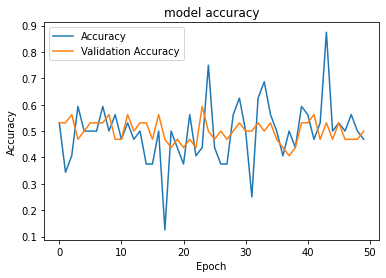

In [10]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [11]:
 model.save("vgg16_1.h5")

In [14]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import keras,os

from keras.preprocessing import image  
안되서 해결방안 찾아옴
https://stackoverflow.com/questions/72383347/how-to-fix-it-attributeerror-module-keras-preprocessing-image-has-no-attribu

1/1 [==============================] - 1s 845ms/step
glasses


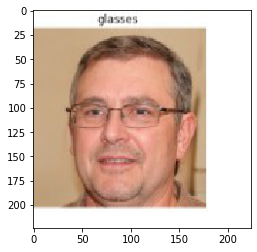

In [21]:
# from keras.preprocessing import image
import keras.utils as image
img = image.load_img("/content/drive/MyDrive/ML_DL_STUDY/File_List/glasses-noglasses/test/row-1-column-9.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("glasses")
else:
    print('no-glasses')